<a href="https://colab.research.google.com/github/Sidhtang/machine-learining-with-CN/blob/main/mnist_using_tensorflow_and_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1500/1500 [==============================] - 25s 14ms/step - loss: 0.5185 - accuracy: 0.8168 - val_loss: 0.4178 - val_accuracy: 0.8505
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3815 - accuracy: 0.8601 - val_loss: 0.3836 - val_accuracy: 0.8647
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3431 - accuracy: 0.8745 - val_loss: 0.3446 - val_accuracy: 0.8733
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3146 - accuracy: 0.8834 - val_loss: 0.3416 - val_accuracy: 0.8796
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3035 - accuracy: 0.8871 - val_loss: 0.3575 - val_accuracy: 0.8696
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2859 - accuracy: 0.8937 - val_loss: 0.3687 - val_accuracy: 0.8695
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - 

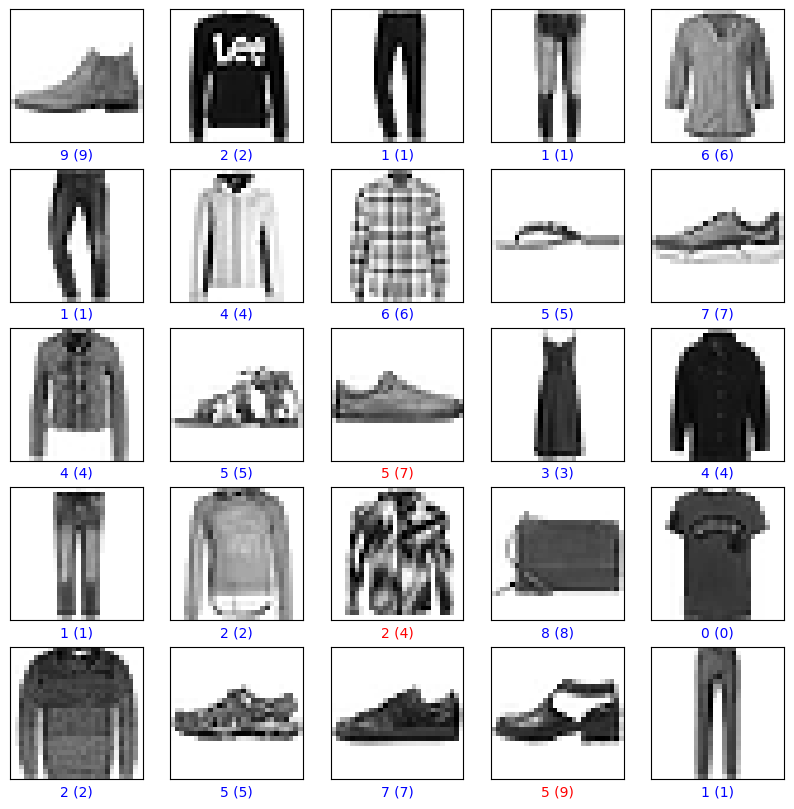

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Make predictions
predictions = model.predict(x_test)

# Function to plot images
def plot_images(images, labels, predictions=None):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        if predictions is None:
            plt.xlabel(np.argmax(labels[i]))
        else:
            predicted_label = np.argmax(predictions[i])
            true_label = np.argmax(labels[i])
            color = 'blue' if predicted_label == true_label else 'red'
            plt.xlabel(f"{predicted_label} ({true_label})", color=color)
    plt.show()

# Plot some test images with their predicted labels
plot_images(x_test, y_test, predictions)